# How to use MeanDecreaseImpurity class

## 0. Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

from eml.importances.mdi import MeanDecreaseImpurity
%matplotlib inline

## 1. Load dataset

In [2]:
iris = load_iris()

## 2. Train model

In [3]:
estimator = RandomForestClassifier()
estimator.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## 3. Compute importances

In [4]:
mdi = MeanDecreaseImpurity(use_precompute=False) # mdi importances are already computed in sklearn
mdi.fit(estimator)
importances = mdi.interpret()

## 4. Display the results

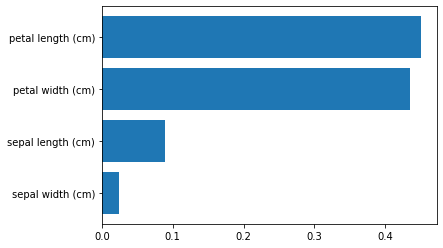

In [5]:
features = [iris.feature_names[idx] for idx in np.argsort(importances)]
sorted_importances = np.sort(importances)

plt.barh(y=features, width=sorted_importances)
plt.show()